In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_798.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_2592.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_318.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_207.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_2248.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_2733.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_2791.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_2393.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_106.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_2986.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_707.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_756.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_1199.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_1758.jpg
/kaggle/input/alzheimer-mr

In [2]:
!zip -r output.zip /kaggle/input/


  adding: kaggle/input/ (stored 0%)
  adding: kaggle/input/alzheimer-mri-dataset/ (stored 0%)
  adding: kaggle/input/alzheimer-mri-dataset/Dataset/ (stored 0%)
  adding: kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/ (stored 0%)
  adding: kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_798.jpg (stored 0%)
  adding: kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_2592.jpg (stored 0%)
  adding: kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_318.jpg (stored 0%)
  adding: kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_207.jpg (stored 0%)
  adding: kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_2248.jpg (stored 0%)
  adding: kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_2733.jpg (stored 0%)
  adding: kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_2791.jpg (stored 0%)
  adding: kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_2393.jpg (stored 0%)
  adding: kaggle/input/alzheimer-mri

In [3]:
import tensorflow as tf 
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pathlib 
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
class_names = ['Very_Mild_Demented', 'Mild_Demented', 'Non_Demented']

In [5]:
path = '../input/alzheimer-mri-dataset/Dataset/'
data_dir = pathlib.Path(path)

In [6]:
data_dir

PosixPath('../input/alzheimer-mri-dataset/Dataset')

In [7]:
class_names = np.array([sorted(item.name for item in data_dir.glob("*"))])
class_names

array([['Mild_Demented', 'Moderate_Demented', 'Non_Demented',
        'Very_Mild_Demented']], dtype='<U18')

In [8]:
imageCount = len(list(data_dir.glob("*/*.jpg") ))
imageCount

6400

In [9]:
batch_size = 32
img_height = 224
img_width = 224

In [10]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=(0.9,1.1),
        fill_mode='nearest')

In [11]:
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.utils import image_dataset_from_directory

train_data = image_dataset_from_directory(
                  data_dir,
                  validation_split=0.2,
                  subset="training",
                  seed=123,
                  image_size=(img_height, img_width),
                  batch_size=batch_size)


val_data = image_dataset_from_directory(data_dir,
                                        validation_split=0.2,
                                        subset="validation",
                                        seed=123,
                                        image_size=(img_height,img_width),
                                        batch_size=batch_size)



Found 6400 files belonging to 4 classes.
Using 5120 files for training.
Found 6400 files belonging to 4 classes.
Using 1280 files for validation.


In [12]:
class_names = train_data.class_names
print(class_names)

['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']


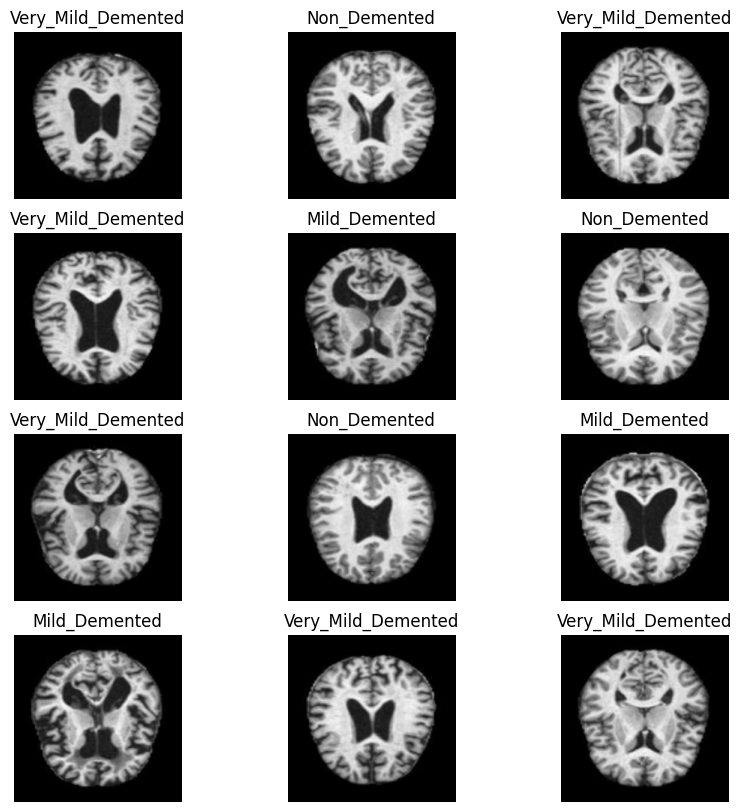

In [13]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
    for i in range(12):
        ax = plt.subplot(4, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [14]:
#libraries to build our neural netwrok model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,GlobalAveragePooling2D
#from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras import backend as k
import keras
from keras.utils import to_categorical
from keras import optimizers
from keras.optimizers import SGD,Adam
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.applications.densenet  import preprocess_input
from keras.models import Model
from tensorflow.keras.utils import img_to_array,array_to_img

#librariy to augment our dataset images
from keras.preprocessing.image import ImageDataGenerator

#libraries to calculate evalution scores of our model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [15]:
densenet_model = Sequential()
pretrained_model=DenseNet201(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3)
)

for layer in pretrained_model.layers:
        layer.trainable=False

densenet_model.add(pretrained_model)
densenet_model.add(GlobalAveragePooling2D())
densenet_model.add(Dense(512, activation='relu'))
densenet_model.add(keras.layers.Dropout(0.3))
densenet_model.add(Dense(4, activation='softmax'))

74836368/74836368 [==============================] - 0s 0us/step


In [16]:
densenet_model.compile(optimizer=Adam(learning_rate=0.0001),loss='SparseCategoricalCrossentropy',metrics=['accuracy'])

In [17]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger,ReduceLROnPlateau

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=3,verbose=1,mode='auto', restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto',min_lr=0.00001)
checkpoint = ModelCheckpoint('DENSENET201.h5', monitor='val_accuracy', save_best_only=True)

In [18]:
callbacks_list = [checkpoint, early_stop,reduce_lr]

In [19]:
#We can now use these generators to train our model.

epochs = 30
history = densenet_model.fit(train_data,
                    epochs=epochs,
                    validation_data=val_data, 
                    batch_size=batch_size)



Epoch 1/30
160/160 [==============================] - 51s 196ms/step - loss: 1.3000 - accuracy: 0.4848 - val_loss: 0.8752 - val_accuracy: 0.5984
Epoch 2/30
160/160 [==============================] - 29s 177ms/step - loss: 0.9599 - accuracy: 0.5525 - val_loss: 0.8551 - val_accuracy: 0.5930
Epoch 3/30
160/160 [==============================] - 29s 179ms/step - loss: 0.8802 - accuracy: 0.5934 - val_loss: 0.8198 - val_accuracy: 0.6383
Epoch 4/30
160/160 [==============================] - 30s 183ms/step - loss: 0.8405 - accuracy: 0.6146 - val_loss: 0.8085 - val_accuracy: 0.6367
Epoch 5/30
160/160 [==============================] - 30s 184ms/step - loss: 0.8315 - accuracy: 0.6227 - val_loss: 0.7900 - val_accuracy: 0.6500
Epoch 6/30
160/160 [==============================] - 29s 183ms/step - loss: 0.7921 - accuracy: 0.6436 - val_loss: 0.7570 - val_accuracy: 0.6680
Epoch 7/30
160/160 [==============================] - 30s 185ms/step - loss: 0.7852 - accuracy: 0.6402 - val_loss: 0.7644 - val_ac

In [20]:
# Evaluate the model
val_data.shuffle = False  # Disable shuffling for evaluation
predictions = densenet_model.predict(val_data)
predicted_classes = np.argmax(predictions, axis=1)

40/40 [==============================] - 9s 139ms/step


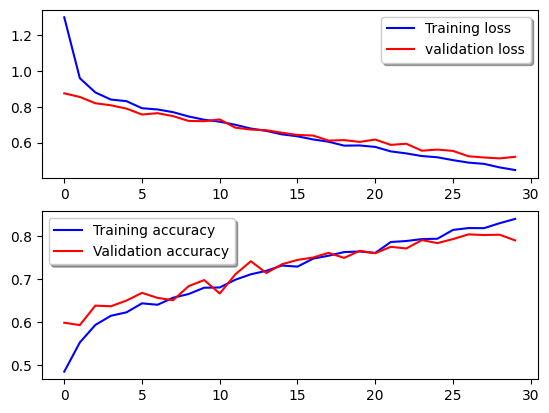

In [21]:
import matplotlib.pyplot as plt
# Plotting the results on Graph
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)